In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/colordetection/colors.csv
/kaggle/input/colordetection/colorpic.jpg
/kaggle/input/colordetection/color_detection.py


In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/kaggle/input/colordetection/colors.csv',names=['Color','AgainColor','Hex','R','G','B'])
data.head()

,Color,AgainColor,Hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Color       865 non-null    object
 1   AgainColor  865 non-null    object
 2   Hex         865 non-null    object
 3   R           865 non-null    int64 
 4   G           865 non-null    int64 
 5   B           865 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 40.7+ KB


In [6]:
Y = data['Color']
X = data[['R','G','B']]
print(X.shape,Y.shape)

(865, 3) (865,)


# **Model**

In [7]:
def get_color(r,g,b,X,Y):
   
    neigh = (((X.values - np.array([r,g,b]))**2).sum())**0.5
    return Y[np.argmax(neigh)]


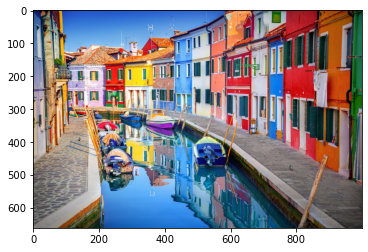

In [8]:
img = cv2.imread('/kaggle/input/colordetection/colorpic.jpg')
cvt_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(cvt_img)

In [ ]:
def color2text(event,x,y,flags,param):
    
    global X,Y
    
    if event==cv2.EVENT_LBUTTONDOWN:
        
        
        b,g,r=img[y,x]
        text=get_color(r,g,b,X,Y)
        cv2.putText(img,text,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(b,g,r),thickness=2)
        cv2.imshow('Image',img)
        
img = cv2.imread('/kaggle/input/colordetection/colorpic.jpg')
cv2.namedWindow('Image')
cv2.setMouseCallback('Image',color2text)

while(True):
    
    cv2.imshow('Image',img)
    
    if cv2.waitKey(20) & 0xFF==27:
        break

cv2.destroyAllWindows()